In [1]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\ranje\Downloads\spam.tsv", sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [6]:
df['label'].value_counts()/len(df)*100

label
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label']=='spam']

In [10]:
ham.shape

(4825, 4)

In [11]:
spam.shape

(747, 4)

In [12]:
ham1 = ham.sample(spam.shape[0])
ham1.shape

(747, 4)

In [15]:
# Balance the data where target value is spam or ham
data = pd.concat([ham1, spam], ignore_index=True)
data.shape

(1494, 4)

In [16]:
data.head()

,label,message,length,punct
0,ham,Do you think i can move &lt;#&gt; in a week,45,5
1,ham,After the drug she will be able to eat.,39,1
2,ham,"Call me da, i am waiting for your call.",39,2
3,ham,I'm gonna say no. Sorry. I would but as normal...,119,6
4,ham,How much u trying to get?,25,1


In [17]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

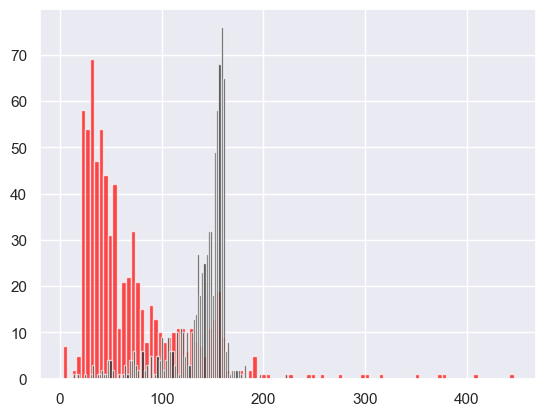

In [22]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7, color= 'black')
plt.show()

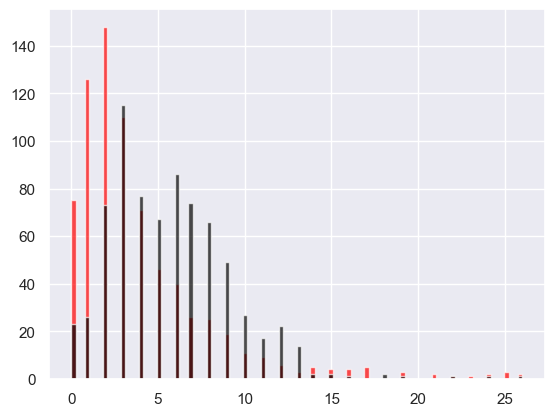

In [23]:
plt.hist(data[data['label']=='ham']['punct'], bins=100, alpha=0.7, color='red')
plt.hist(data[data['label']=='spam']['punct'], bins=100, alpha=0.7, color= 'black')
plt.show()

## Spliting the data  for build the model

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'], test_size=0.3, random_state=1)

In [101]:
type(x_train)

pandas.core.series.Series

# Build the NLP Model to convert the text to vector from TF-IDF Method

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ML Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline package to merge the NLP and ML together and get output

from sklearn.pipeline import Pipeline

## RandomForest Classifer Algorithm

In [48]:
classifier = Pipeline([('TF-IDF', TfidfVectorizer()),('classifier', RandomForestClassifier())])

In [50]:
classifier.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [51]:
y_pred_train = classifier.predict(x_train)

In [52]:
# predict the model
y_pred_test = classifier.predict(x_test)

In [53]:
y_pred_test

array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam',
       'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam',
       'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
       'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
       'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
       'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam',
       'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam',

In [54]:
y_pred_test, y_test

(array(['ham', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam', 'ham',
        'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
        'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam',
        'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam', 'spam',
        'ham', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'spam', 'spam', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam',
        'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'spam', 'spam',
        'spam', 'ham', 'ham', 'spam', 'ham', 'ham', '

In [55]:
# Evaluation Matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [56]:
print(confusion_matrix(y_test,y_pred_test))

[[221   1]
 [ 18 209]]


In [57]:
print(confusion_matrix(y_train,y_pred_train))

[[525   0]
 [  0 520]]


In [58]:
print(accuracy_score(y_test,y_pred_test))
print("*****************"*10)
print(accuracy_score(y_train,y_pred_train))

0.9576837416481069
**************************************************************************************************************************************************************************
1.0


In [59]:
print(classification_report(y_test,y_pred_test))
print("*****************"*10)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       222
        spam       1.00      0.92      0.96       227

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449

**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       525
        spam       1.00      1.00      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [69]:
classifier1 = Pipeline([('TF-IDF', TfidfVectorizer()),('classifier',SVC())])

In [70]:
classifier1.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()), ('classifier', SVC())])

In [71]:
y_pred_train1 = classifier1.predict(x_train)
y_pred_test1= classifier1.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred_test))
print("*****************"*10)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         ham       0.49      1.00      0.66       222
        spam       0.00      0.00      0.00       227

    accuracy                           0.49       449
   macro avg       0.25      0.50      0.33       449
weighted avg       0.24      0.49      0.33       449

**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67       525
        spam       0.00      0.00      0.00       520

    accuracy                           0.50      1045
   macro avg       0.25      0.50      0.33      1045
weighted avg       0.25      0.50      0.34      1045



In [73]:
print(accuracy_score(y_test,y_pred_test1))
print("*****************"*10)
print(accuracy_score(y_train,y_pred_train1))

0.9599109131403119
**************************************************************************************************************************************************************************
1.0


## XGBoost Classifier

In [74]:
from xgboost import XGBClassifier

In [75]:
classifier2 = Pipeline([('TF-IDF', TfidfVectorizer()),('classifier',XGBClassifier())])

In [77]:
data['label'] = np.where(data['label']=='ham',0,1)

In [78]:
data.head()

,label,message,length,punct
0,0,Do you think i can move &lt;#&gt; in a week,45,5
1,0,After the drug she will be able to eat.,39,1
2,0,"Call me da, i am waiting for your call.",39,2
3,0,I'm gonna say no. Sorry. I would but as normal...,119,6
4,0,How much u trying to get?,25,1


In [79]:
data.shape

(1494, 4)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(data['message'],data['label'], test_size=0.3, random_state=1)

In [81]:
classifier2.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [90]:
y_pred_train2 = classifier2.predict(x_train)
y_pred_test2 = classifier2.predict(x_test)

In [91]:
print(accuracy_score(y_test,y_pred_test2))
print("*****************"*10)
print(accuracy_score(y_train,y_pred_train2))

0.9398663697104677
**************************************************************************************************************************************************************************
0.9961722488038277


In [92]:
print(classification_report(y_test,y_pred_test2))
print("*****************"*10)
print(classification_report(y_train,y_pred_train2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       222
           1       0.97      0.91      0.94       227

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449

**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       525
           1       1.00      0.99      1.00       520

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045



In [93]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [94]:
x_train,x_test,y_train,y_test = train_test_split(df['message'],df['label'], test_size=0.3, random_state=1)

In [95]:
classifier_without_balance = Pipeline([('TF-IDF', TfidfVectorizer()),('classifier',RandomForestClassifier())])

In [96]:
classifier_without_balance.fit(x_train,y_train)

Pipeline(steps=[('TF-IDF', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [98]:
y_pred_train = classifier_without_balance.predict(x_train)
y_pred_test = classifier_without_balance.predict(x_test)

In [99]:
print(classification_report(y_test,y_pred_test))
print("*****************"*10)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1442
        spam       0.99      0.83      0.90       230

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

**************************************************************************************************************************************************************************
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3383
        spam       1.00      1.00      1.00       517

    accuracy                           1.00      3900
   macro avg       1.00      1.00      1.00      3900
weighted avg       1.00      1.00      1.00      3900



In [100]:
print(accuracy_score(y_test,y_pred_test))
print("*****************"*10)
print(accuracy_score(y_train,y_pred_train))

0.9754784688995215
**************************************************************************************************************************************************************************
1.0
